#Data set Loan Data

Vamos a explorar los datos disponibles públicamente de [LendingClub.com](www.lendingclub.com). Lending Club conecta a personas que necesitan dinero (prestatarios) con personas que tienen dinero (inversores). Es de esperar que, como inversor, quieras invertir en personas que muestren un perfil de alta probabilidad de devolverte el dinero. Intentaremos crear un modelo que ayude a predecir esto.

Lending club tuvo un [año muy interesante en 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), así que echemos un vistazo a algunos de sus datos y tengamos en cuenta el contexto. Estos datos son anteriores a su salida a bolsa.

Utilizaremos datos de préstamos de 2007-2010 y trataremos de clasificar y predecir si el prestatario pagó o no la totalidad de su préstamo. Puede descargar los datos de [aquí](https://www.lendingclub.com/info/download-data.action) o simplemente utilizar el csv ya proporcionado. Se recomienda utilizar el csv proporcionado ya que ha sido limpiado de valores NA.





Esto es lo que representan las columnas
* credit.policy: 1 si el cliente cumple los criterios de suscripción crediticia de LendingClub.com, y 0 en caso contrario.
* purpose: El propósito del préstamo (toma los valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", y "all_other").
* int.rate: La tasa de interés del préstamo, como proporción (una tasa del 11% se almacenaría como 0,11). A los prestatarios que LendingClub.com considera más arriesgados se les asignan tasas de interés más altos.
* installment : Las cuotas mensuales adeudadas por el prestatario si se financia el préstamo.
* log.anual.inc: El logaritmo natural de los ingresos anuales declarados por el prestatario.
* dti: La relación deuda-ingresos del prestatario (importe de la deuda dividido por los ingresos anuales).
* fico: La puntuación de crédito FICO del prestatario.
* days.with.cr.line: El número de días que el prestatario ha tenido una línea de crédito.
* revol.bal: El saldo rotatorio del prestatario (importe impagado al final del ciclo de facturación de la tarjeta de crédito).
* revol.util: La tasa de utilización de la línea de crédito renovable del prestatario (la cantidad de la línea de crédito utilizada en relación con el crédito total disponible).
* inq.last.6mths: Número de solicitudes de información del prestatario por parte de los acreedores en los últimos 6 meses.
* delinq.2años: El número de veces que el prestatario se ha retrasado más de 30 días en un pago en los últimos 2 años.
* pub.rec: El número de registros públicos negativos del prestatario (declaraciones de quiebra, embargos fiscales o sentencias).

## Importar Librerías

Importa las librerías habituales para pandas y plotting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cargar datos

In [ ]:
#Leer archivo loan_data

#Revisar los tipos de datos


In [ ]:
#Revisar las primeras filas

#Note que uno a de las caracteristicas es categorica: "purpose"


**Características categóricas**

Observe que la columna **purpose** es categórica. Para que los clasificadores puedan entenderla vamos a transformarla a una variable númerica, empleando caracteristicas adicionales ficticias. Para esto podemos usar la función pd.get_dummies.

Cree una lista con los nombres de las caracteristicas categoricas se que desee transformar. En este caso la lista solo tendra un elemento. Pero se puede ampliar a múltiples características categóricas si es necesario.

In [ ]:
#Lista de caracteristicas categoricas

#Transformación de datos con la función get_dummies
#Este método crea una nueva caracteristica boleana para cada categoria

#Revisamos los datos finales


# Train Test Split

Ahora, vamos a dividir los datos en el conjunto de entrenamiento y prueba.



In [ ]:
#Importar funcion train_test_split
from sklearn.model_selection import train_test_split
#Organizar datos de entranda X

#Organizar etiquetas

#Separar los conjuntos de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#Revisemos los datos de entrenamiento
print("Número de datos de entrenamiento:")
print("Número de personas que pagaron su prestamo (clase 0): ")
print(len(y_train[y_train==0]))
print("Número de personas que no pagaron su prestamo (clase 1): ")
print(len(y_train[y_train==1]))


#Clasificación
Vamos a realiz un análisis comparativo de diferentes clasificadores:

1.   Bayes
2.   KNN
3.   SVM
4.   Arboles de decisión
5.   NN (nuestra primera red!!)
6.   Random Forest (nuestro primer método de ensamble!!)




In [ ]:
#Importar librerias


---
# Bayes Naive



In [ ]:
#Crear una instancia del modelo
bayes_model = GaussianNB()
#Entrenar
bayes_model.fit(X_train,y_train)
#Predecir
y_pred_bayes = bayes_model.predict(X_test)
#Evaluar el desempeño
#Matriz de confusión
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bayes, display_labels=bayes_model.classes_)
disp.plot()
# Métricas de desempeño
print(classification_report(y_test,y_pred_bayes))
print("kappa: " + str(cohen_kappa_score(y_test,y_pred_bayes)))

**Validación cruzada**
La validación cruzada o cross-validation permite evaluar los resultados de predicción de forma independiente a la partición entre datos de entrenamiento y prueba.

Para esto, se repite varias veces el entrenamiento y se calcula la media de la metrica de desempeño sobre las diferentes particiones.

In [ ]:
#Validación cruzada





---
# KNN



In [ ]:
#Creamos una instancia del modelo
#Se requiere definir el número de vecino: k
#Inicialmente probemos con 1 solo vecino
knn = KNeighborsClassifier(n_neighbors=1)
#Entrenar
knn.fit(X_train,y_train)
#Predecir
y_pred_knn = knn.predict(X_test)
#Evaluar el desempeño
#Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot()
#Metricas de desempeño
print(classification_report(y_test,y_pred_knn))
print("kappa: " + str(cohen_kappa_score(y_test,y_pred_knn)))

Utilicemos el método del codo para elegir un buen valor de K.


In [ ]:
error_rate = []

for i in range(1,15):
    #Entrenar con k=i
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    #Predecir
    pred_i = knn.predict(X_test)
    #Calcular el error
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
#Graficamos el error en función de k
#El método del codo consiste en seleccionar el k donde se obtine el primer error más bajo
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#Vamos a probar nuestro clasificador para el k seleccionado
knn = KNeighborsClassifier(n_neighbors=8)
#Entrenar
knn.fit(X_train,y_train)
#Predecir
y_pred_knn = knn.predict(X_test)
#Evaluar
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot()
#Metricas de desempeño
print(classification_report(y_test,y_pred_knn))
print("kappa: " + str(cohen_kappa_score(y_test,y_pred_knn)))

# SVM

In [ ]:
#parametros por defecto
#kernel 'rbf'
#sigma = 1(n_features*varX)
#Primero sin balancel y despues con balanceo
svc_model = SVC()
#Entrenamos
svc_model.fit(X_train,y_train)
#Predecimos
y_pred_svm = svc_model.predict(X_test)
#Evaluamos desempeño
#Matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svc_model.classes_)
disp.plot()
#Metricas de desempeño
print(classification_report(y_test,y_pred_svm))
print("kappa: " + str(cohen_kappa_score(y_test,y_pred_svm)))



---
#Arbol de decisión


In [ ]:
#Instancia del clasificador con parametros por defecto
#Criterio: 'gini'
dtree = DecisionTreeClassifier()
#Entrenamos
dtree.fit(X_train,y_train)
#Predecimos
y_pred_ad = dtree.predict(X_test)
#Evaluamos el desempeño
#Matriz de confusión
cm_ad = confusion_matrix(y_test, y_pred_ad)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ad, display_labels=dtree.classes_)
disp.plot()
#Metricas de desempeño
print(classification_report(y_test,y_pred_ad))
print("kappa: " + str(cohen_kappa_score(y_test,y_pred_ad)))



---

#MLP



In [ ]:
#Importacion de librerias


In [ ]:
#Instancia del clasificador
# 2 capas ocultas con 10 neuronas cada una
# Función de activación ReLu

#Entrenamos


In [ ]:
#Predecimos
y_pred_mlp = mlp.predict(X_test)
#Evaluamos el desempeño
#Matriz de confusión
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=mlp.classes_)
disp.plot()
#Metricas de desempeño
print(classification_report(y_test,y_pred_mlp))
print("kappa: " + str(cohen_kappa_score(y_test,y_pred_mlp)))



---
#Random Forest


In [ ]:
#Importacion de librerias


In [ ]:
#Instancia del clasificador
#Número de arboles por defecto = 100

#Entrenamos


In [ ]:
#Predecimos
y_pred_rf = rfc.predict(X_test)
#Evaluamos el desempeño
#Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rfc.classes_)
disp.plot()
#Metricas de desempeño
print(classification_report(y_test,y_pred_rf))
print("kappa: " + str(cohen_kappa_score(y_test,y_pred_rf)))



---
# Comparación del desempeño


In [ ]:
from sklearn.metrics import balanced_accuracy_score


print("1. Bayes: ")
print("Accuracy: ", round(balanced_accuracy_score(y_test,y_pred_bayes),2))
print("kappa: ", round(cohen_kappa_score(y_test,y_pred_bayes),2))
print('--')
print("2. KNN: ")
print("Accuracy: ", round(balanced_accuracy_score(y_test,y_pred_knn),2))
print("kappa: ", round(cohen_kappa_score(y_test,y_pred_knn),2))
print('--')
print("3. SVM: ")
print("Accuracy: ", round(balanced_accuracy_score(y_test,y_pred_svm),2))
print("kappa: ", round(cohen_kappa_score(y_test,y_pred_svm),2))
print('--')
print("4. Decision Tree: ")
print("Accuracy: ", round(balanced_accuracy_score(y_test,y_pred_ad),2))
print("kappa: ", round(cohen_kappa_score(y_test,y_pred_ad),2))
print('--')
print("5. MLP: ")
print("Accuracy: ", round(balanced_accuracy_score(y_test,y_pred_mlp),2))
print("kappa: ", round(cohen_kappa_score(y_test,y_pred_mlp),2))
print('--')
print("6. Ranfom Forest: ")
print("Accuracy: ", round(balanced_accuracy_score(y_test,y_pred_rf),2))
print("kappa: ", round(cohen_kappa_score(y_test,y_pred_rf),2))

Para desarrollar el proceso completo de ML, una vez comparamos varios modelos, podemos seleccionar 2 o 3 y tratar de optimizar los hiperparametros. Por ejemplo, en MLP se puede variar el número de capas y neuronas ocultas, en RF el número de estimadores y profundidad de los mismos.

Adicionalmente, para buscar mejorar los resultados de clasificación podemos hacer un analisis previo de la calidad e importancia de las caracteristicas. Es decir, determinar cuales caracteristicas están aportando al problema y entrenar un clasificador solo con ellas.

# Seleccion de caracteristicas importantes

Una de las herramientas de proporciona Random Forest es la medida de la importancia de las características. Es decir, que además de proporcionarnos un modelo de clasificación, es un selector de características. La importancia se determina por la frecuencia que una característica es seleccionada para la construcción de un árbol de decisión.

In [ ]:
#Imprimir no
final_data.columns.drop('not.fully.paid')

In [ ]:
#La informacion sobre la importancia de cada caracteristica se encuentra en el atributo
#feature_importances_ del modelo.
#Lo organizamos en una Serie para su visualizacion
feature_imp = pd.Series(rfc.feature_importances_,index=final_data.columns.drop('not.fully.paid')).sort_values(ascending=False)
feature_imp

installment                   0.114664
revol.util                    0.113288
log.annual.inc                0.112001
days.with.cr.line             0.111935
revol.bal                     0.111292
dti                           0.110398
int.rate                      0.104547
fico                          0.078359
inq.last.6mths                0.055402
purpose_debt_consolidation    0.015153
delinq.2yrs                   0.014148
credit.policy                 0.014016
purpose_small_business        0.009776
pub.rec                       0.009417
purpose_credit_card           0.008152
purpose_home_improvement      0.007326
purpose_educational           0.005696
purpose_major_purchase        0.004430
dtype: float64

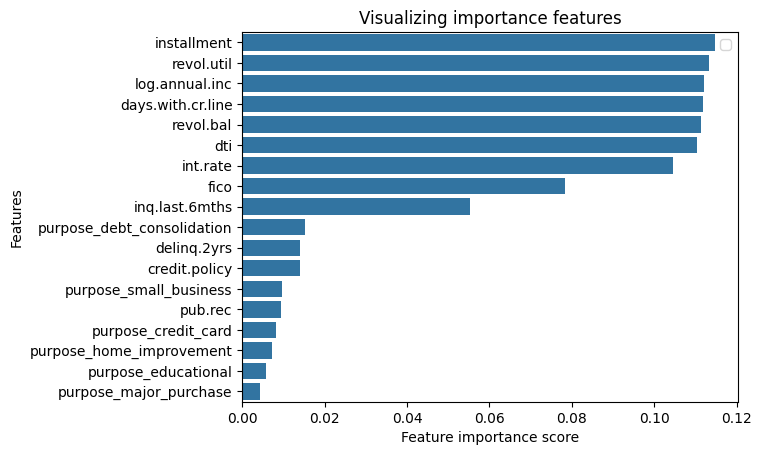

In [ ]:
#Este tipo de analisis permite decidir si queremos continuar con todo el conjunto
#de caracteristicas, o seleccionar solo las mas importantes
#Reducir el espacio de representacion permite reducir los costos computacionales
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title("Visualizing importance features")
plt.legend()
plt.show()

In [ ]:
#Entrenamiento de un modelo usando solo las caracteristicas mas relevantes
#Seleccionamos el conjunto de caracteristicas
X = final_data[['installment', 'days.with.cr.line', 'dti', 'revol.util', 'revol.bal', 'log.annual.inc', 'int.rate']]
y = final_data['not.fully.paid']

#Dividimos de nuevo el conjunto de datos
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2413
           1       0.50      0.01      0.02       461

    accuracy                           0.84      2874
   macro avg       0.67      0.50      0.47      2874
weighted avg       0.79      0.84      0.77      2874

kappa: 0.014519121057634754


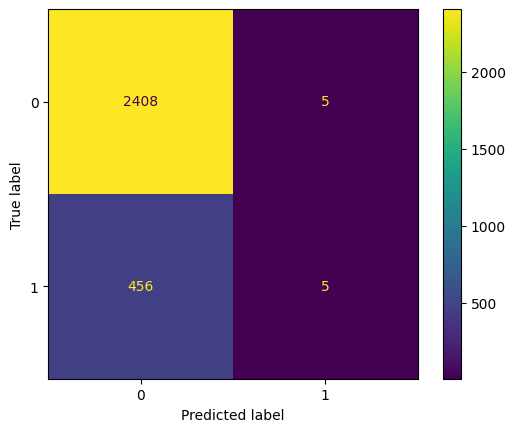

In [ ]:
#Instancia del clasificador
#Número de arboles por defecto = 100
rfc = RandomForestClassifier(n_estimators=600)
#Entrenamos
rfc.fit(X_train,y_train)
#Predecimos
y_pred_rf = rfc.predict(X_test)
#Evaluamos el desempeño
#Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rfc.classes_)
disp.plot()
#Metricas de desempeño
print(classification_report(y_test,y_pred_rf))
print("kappa: " + str(cohen_kappa_score(y_test,y_pred_rf)))